<a href="https://colab.research.google.com/github/alicenyms/Python-Notebook/blob/main/Random_Forest_vs_Neural_Network_Model_for_MNIST_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Random Forest vs Neural Network Model for MNIST Digit Classification
The random forest model is frequently compared to the neural network model because both can model data with non-linear relationship variables and deal with their interactions, therefore this notebook will compare their prediction performances for MNIST Digit Classification

##Import neccessary packages

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Load the MNIST dataset from Keras
MNIST Dataset was loaded from Keras. The shape of the train_images, train_labels, test_images and test_labels were printed for reference. The training dataset contains 60000 handwritten digit images, and the testing dataset contains 10000 handwritten digit images with corresponding labels (digits from 0 to 9).

In [ ]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(f'Shape of train_images: {train_images.shape}')
print(f'Shape of train_labels: {train_labels.shape}')
print(f'Shape of test_images: {test_images.shape}')
print(f'Shape of test_labels: {test_labels.shape}')

11501568/11490434 [==============================] - 0s 0us/step
Shape of train_images: (60000, 28, 28)
Shape of train_labels: (60000,)
Shape of test_images: (10000, 28, 28)
Shape of test_labels: (10000,)


##Explore data sample from the downloaded dataset
Training data with index 0 and its corresponding labels were printed for data exploration. Each image has 28 rows with 28 numbers which range from 0 to 255 to represent the grey level of the pixel. The image with index 0 was also plotted for visualization.

*** train_images (index 0) with train_label = 5 : 
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   

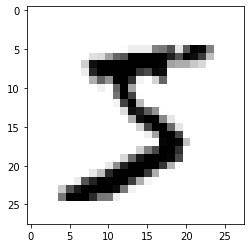

In [ ]:
print(f'*** train_images (index 0) with train_label = {train_labels[0]} : \n {train_images[0]}.')
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.show()

## Random Forest

###Data preprocessing for Random Forest Model

The training data were normalized by the maximum value 255 and reshaped from a 28*28 2D array to a 1D array. The shape of rf_train_images and rf_test_images were printed as follow:


In [ ]:
rf_train_images = train_images.reshape((60000, 28*28))/255
rf_test_images = test_images.reshape((10000, 28*28))/255
print(f'Shape of rf_train_images: {rf_train_images.shape}.')
print(f'Shape of rf_test_images: {rf_test_images.shape}.')

Shape of rf_train_images: (60000, 784).
Shape of rf_test_images: (10000, 784).


###Model Training
RandomForestClassifer was imported via sklearn.ensemble. The training data were then fed for model training.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(rf_train_images,train_labels)

RandomForestClassifier()

###Model prediction
The trained model was then used to predict the test images and train images.


In [ ]:
rf_test_images_predict = rf_model.predict(rf_test_images)
rf_train_images_predict = rf_model.predict(rf_train_images)

###Model Evaluation
Accuracy was used as the performance metric for model evaluation. The training accuracy of the model is 1 while the testing accuracy of the model is 0.9697.

In [ ]:
import sklearn.metrics as mt
print('The training accuracy of the Random Forest Model is:', mt.accuracy_score (rf_train_images_predict,train_labels))
print('The tesing accuracy of the Random Forest Model is:', mt.accuracy_score (rf_test_images_predict,test_labels))

The training accuracy of the Random Forest Model is: 1.0
The tesing accuracy of the Random Forest Model is: 0.9697


## Neural Network


In [ ]:
from keras import models
from keras import layers
from keras.utils.np_utils import to_categorical

### Data preparation for Neural Network Model:
The training data were normalized by the maximum value 255 and reshaped from a 28*28 2D array to a 1D array. The labels of training and testing data were transformed into categories using the to_categorical function from keras.utils.np_utils. The shape of nn_train_images , nn_test_images, nn_train_labels and nn_test_labels were printed as follow:


In [ ]:
nn_train_images = train_images.reshape((60000, 28*28))/255
nn_test_images = test_images.reshape((10000, 28*28))/255
nn_train_labels = to_categorical(train_labels)
nn_test_labels = to_categorical(test_labels)

print(f'Shape of nn_train_images: {nn_train_images.shape}')
print(f'Shape of nn_train_labels: {nn_train_labels.shape}')
print(f'Shape of nn_test_images: {nn_test_images.shape}')
print(f'Shape of nn_test_labels: {nn_test_labels.shape}')
print(f'nn_train_labels: \n {nn_train_labels}')

Shape of nn_train_images: (60000, 784)
Shape of nn_train_labels: (60000, 10)
Shape of nn_test_images: (10000, 784)
Shape of nn_test_labels: (10000, 10)
nn_train_labels: 
 [[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


###Design the architecture of neural network
The architecture of the neural network will basically the same as indicated in lecture 2 with ReLU as the activation function for the hidden layer and Softmax as the activation function as the output layer. Meanwhile, the number of the hidden units was changed to 256 compared with the original number of 512.

In [ ]:
network = models.Sequential()
network.add(layers.Dense(256, activation = 'relu', input_shape=(28*28,)))
network.add(layers.Dense(10,activation='softmax'))
network.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])


With the .summary() function, we can have an overview of the network model, different information was shown in the output like layer type, output shape, number of parameters, etc.

In [ ]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


<b> Steps done:
* Set seed to get reproducible results
* Design the architecture of neural network
* Train the neural network model
* Model evaluation


In [ ]:
#Set seed to get reproducible results for comparison
#Source: https://stackoverflow.com/questions/50659482/why-cant-i-get-reproducible-results-in-keras-even-though-i-set-the-random-seeds
seed_value=123
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
import numpy as np
np.random.seed(seed_value)
import tensorflow as tf
tf.random.set_seed(seed_value)
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

#Design the architecture of neural network
epochs=20
hidden_layers=512

network = models.Sequential()
network.add(layers.Dense(hidden_layers, activation = 'relu', input_shape=(28*28,)))
network.add(layers.Dense(10,activation='softmax'))
network.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

network.summary()

#Model training
network.fit(nn_train_images,nn_train_labels, epochs=epochs, batch_size=128)

#Evaluate the model
test_loss, test_accuracy = network.evaluate(nn_test_images, nn_test_labels)
print('The accuracy of the Neural Network Model is:', test_accuracy)

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_66 (Dense)            (None, 512)               401920    
                                                                 
 dense_67 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
469/469 [==============================] - 5s 10ms/step - loss: 0.2557 - accuracy: 0.9265
Epoch 2/20
469/469 [==============================] - 5s 10ms/step - loss: 0.1044 - accuracy: 0.9688
Epoch 3/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0682 - accuracy: 0.9794
Epoch 4/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0499 - accuracy: 0.9850
Epoch 5/20
469/469 [===================

**Make prediction using the model**

In [ ]:
nn_test_images_predict = network.predict(nn_test_images)
nn_test_images_predict

array([[6.0320972e-18, 7.8123459e-24, 2.5360973e-14, ..., 1.0000000e+00,
        3.4873562e-18, 4.5549905e-12],
       [1.1781630e-21, 5.5553179e-12, 1.0000000e+00, ..., 0.0000000e+00,
        1.7712843e-15, 2.4712285e-32],
       [5.5369734e-16, 9.9999988e-01, 6.9645687e-08, ..., 6.7835351e-09,
        1.8865505e-08, 8.5368195e-14],
       ...,
       [1.6752214e-30, 8.2538383e-25, 4.9245327e-25, ..., 8.1873805e-12,
        9.5586889e-14, 2.8468303e-10],
       [6.9158721e-22, 1.4985806e-22, 1.9690683e-27, ..., 1.8003515e-23,
        4.6397738e-12, 1.4109844e-23],
       [3.1817515e-24, 0.0000000e+00, 4.8049542e-25, ..., 1.8040625e-32,
        1.2164415e-24, 6.0317380e-30]], dtype=float32)

**Evaluate the model**

In [ ]:
train_loss, train_accuracy = network.evaluate(nn_train_images, nn_train_labels)
print('The training accuracy of the Neural Network Model is:', train_accuracy)

test_loss, test_accuracy = network.evaluate(nn_test_images, nn_test_labels)
print('The testing accuracy of the Neural Network Model is:', test_accuracy)

1875/1875 [==============================] - 6s 3ms/step - loss: 3.6985e-04 - accuracy: 0.9999
The training accuracy of the Neural Network Model is: 0.9998666644096375
313/313 [==============================] - 1s 3ms/step - loss: 0.0966 - accuracy: 0.9842
The testing accuracy of the Neural Network Model is: 0.9842000007629395


Since choosing the value of hyperparameters is a trial-and-error process, therefore in this exercise, I used the same model architecture as shown in the lecture notes while also fixed the value of batch size to 128. On the other hand, I tried to vary **the value of the number of hidden units in the hidden layer** and **the number of epochs during training.**

The test accuracy result summary is shown in the following table: 

Number of Hidden Units | Batch Size | Epochs | Testing Accuracy  
--- | --- | --- | ---
512 | 128 | 2 | 0.969900012
512 | 128 | 5 | 0.978799999
512 | 128 | 10 | 0.981599987
**512** | **128** | **20** | **0.984200001**
512 | 128 | 30 | 0.982900023
512 | 128 | 50 | 0.983299971
512 | 128 | 60 | 0.983399987
512 | 128 | 70 | 0.983299971
256 | 128 | 2 | 0.967499971
256 | 128 | 5 | 0.973699987
256 | 128 | 10 | 0.981100023
256 | 128 | 20 | 0.980599999
256 | 128 | 30 | 0.980799973
256 | 128 | 50 | 0.981400013
256 | 128 | 60 | 0.98150003
256 | 128 | 70 | 0.98150003

**The summary shows that under the batch size =128 situation with the number of hidden units = 512 and the number of epochs = 20 can obtain the best test accuracy.**


Based on the performance metric on testing data of both models, the neural network model has better accuracy than the random forest model. (i.e., The testing accuracy of the random forest model is 0.9697 while the testing accuracy of the neural network model is 0.9842.)
 
The reasons why the neural network model has better accuracy than the random forest model can be explained in terms of different aspects.


 
Firstly, the random forest model has a more severe overfitting problem (overfitting problem occurs when the training accuracy is higher than the testing accuracy)than the neural network. The training accuracy of the random forest model even reaches 100% as shown in the following table.

Algorithm | Training Accuracy | Testing Accurancy | Difference (Training accuracy – Testing accuracy) 
--- | --- | --- | ---
Random Forest Model | 1 | 0.9697 | 0.0303
Neural Network Model | 0.9998 | 0.9842 | 0.0156

Secondly, the result can be explained by the working principle of two algorithms and the features of the dataset.
 
A random forest algorithm is an ensemble of individual decision trees. In the ensemble, each decision tree is independent of the others and each of them will have a class prediction. The decision of the random forest model is made by voting, that is, the class with the most votes will become the random forest model prediction.
 
While for the neural network algorithm, it is a network with connected neurons. Due to the connective features of the network, those neurons cannot perform without others, unlike each individual decision tree in the random forest model. The neurons are grouped in different types of layers and perform data processing and data passing from one layer to another process and make the decisions in the output layer batch by batch during one training epoch. 
 
In our neural network model, we have hidden layers, hidden layers are often the key component that allows the network model to capture the non-linear relationships between the data, deal with the complex tasks and increase the performance of the model. Since MINST is a dataset that contains a huge number of handwritten digits and the relationship between data is non-linear, therefore neural network is a suitable algorithm for it. Meanwhile, the amount of data inside the MNIST dataset is huge to benefit the neural network model (i.e., 60000 images for training data and 10000 images for testing data). For the neural network model, the larger amount of data we fed into the model, the accuracy is generally higher. 